# Modeling - Regression with Elastic Net (Baseline)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import root_mean_squared_error
from linearmodels.panel import PanelOLS
import os
import seaborn as sns
import statsmodels.api as sm
from itertools import product
from sklearn.linear_model import ElasticNet
import pickle
current_dir = os.getcwd()

In [2]:
df_test = pd.read_pickle("cleaned_test_dataset.pkl")

display(df_test.head(3))
print("Shape: ", df_test.shape)

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wcovid_vaccinated_or_accept,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wwork_outside_home_1d,...,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d,State,County Name,day_of_week
0,2021-02-06,10001,32.699199,19.187633,8.791025,68.827417,65.663218,26.680991,65.330731,48.183010,...,20.026080,37.648337,27.671691,4.305266,30.862734,94.674122,7.642234,Delaware,Kent,Saturday
1,2021-02-07,10001,36.819275,15.249906,8.246346,68.527244,64.955920,26.667758,62.730589,46.288597,...,23.522186,37.956024,27.388525,5.361903,30.822502,94.978346,6.125545,Delaware,Kent,Sunday
2,2021-02-08,10001,37.701923,16.060492,7.767191,68.869323,63.241518,27.913755,63.037248,46.398122,...,22.507475,37.308655,27.576218,4.921152,30.082840,95.138547,5.769898,Delaware,Kent,Monday


Shape:  (2750, 22)


In [3]:
target_var = 'smoothed_wcovid_vaccinated'
list_features = [col for col in df_test.columns if col not in ["time_value",'geo_value','state','county_name'
                                                                ,'day_of_week','day','week_of_month','State'
                                                                ,'County Name','day_of_week'
                                                                ,target_var]]

In [4]:
list_all_faeture = list_features.copy()
list_all_faeture.append("constant")
df_test['constant'] = 1.0

In [5]:
with open(current_dir + r"\regression_model_baseline.pkl", "rb") as f:
    best_model = pickle.load(f)

In [6]:
pred_y_test = best_model.predict(df_test[list_all_faeture])
test_rmse = root_mean_squared_error(df_test[target_var], pred_y_test)

print(f"Test RMSE: {test_rmse:.4f}")

Test RMSE: 9.3184


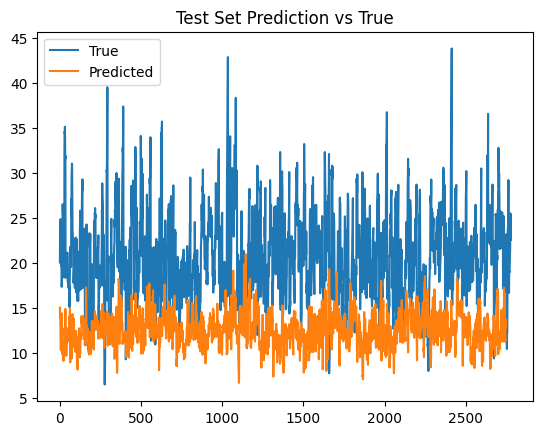

In [7]:
plt.plot(df_test[target_var], label="True")
plt.plot(pred_y_test, label="Predicted")
plt.title("Test Set Prediction vs True")
plt.legend()
plt.show()

Text(0.5, 1.0, 'OLS Error Distribution')

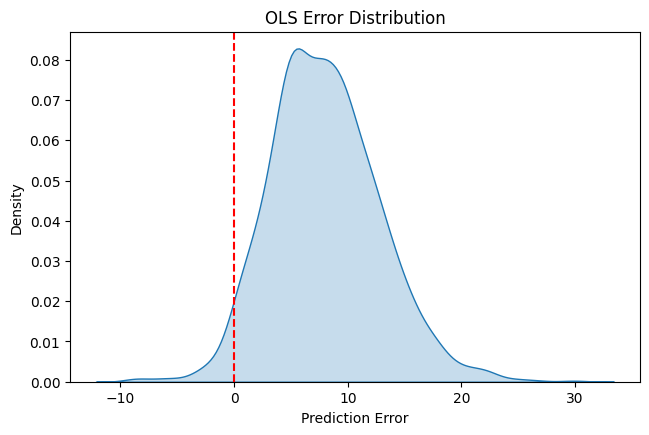

In [8]:
plt.figure(figsize=(25, 10))
plt.subplot(234)
sns.kdeplot(df_test[target_var] - pred_y_test, 
            label='OLS Error', fill=True)
plt.axvline(x=0, color='r', linestyle='--')
plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.title('OLS Error Distribution')